<a href="https://colab.research.google.com/github/Neha-Seirah/Deep-Learning/blob/main/DL_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [8]:
df = pd.read_csv('/content/dl5.csv')
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [9]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [10]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [11]:
df = df.drop(columns=['State'])

In [12]:
from sklearn.preprocessing import LabelEncoder

columns=['Voice mail plan','International plan','Churn']

for i in columns:
  encoder = LabelEncoder()
  df[i] = encoder.fit_transform(df[i])

In [13]:
from sklearn.preprocessing import StandardScaler

dataScale = df.drop(columns=['Churn'])
for i in dataScale.columns:
    scale = StandardScaler()
    df[i] = scale.fit_transform(df[i].values.reshape(-1, 1))

In [14]:
x = df.drop(columns=['Churn'])
y = df['Churn']


In [15]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

Baseline DNN Architecture
constructing a simple baseline DNN architecture without any dropout layers.

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [17]:
def baseline_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

baseline_model = baseline_model()
baseline_history = baseline_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

baseline_model.evaluate(X_val, y_val)

baseline_predictions = baseline_model.predict(X_val)
baseline_pred_labels = (baseline_predictions > 0.5).astype(int)

baseline_accuracy = accuracy_score(y_val, baseline_pred_labels)
print(f'Baseline Model Accuracy: {baseline_accuracy}')

baseline_f1_score = f1_score(y_val, baseline_pred_labels)
print(f'Baseline Model F1 Score: {baseline_f1_score}')

baseline_roc_auc = roc_auc_score(y_val, baseline_pred_labels)
print(f'Baseline Model roc Score: {baseline_roc_auc}')

Epoch 1/10
17/17 [==============================] - 4s 116ms/step - loss: 0.4826 - accuracy: 0.8443 - val_loss: 0.3709 - val_accuracy: 0.8881
Epoch 2/10
17/17 [==============================] - 0s 23ms/step - loss: 0.3809 - accuracy: 0.8499 - val_loss: 0.3373 - val_accuracy: 0.8881
Epoch 3/10
17/17 [==============================] - 0s 15ms/step - loss: 0.3287 - accuracy: 0.8537 - val_loss: 0.3160 - val_accuracy: 0.8881
Epoch 4/10
17/17 [==============================] - 0s 11ms/step - loss: 0.2927 - accuracy: 0.8668 - val_loss: 0.2921 - val_accuracy: 0.9104
Epoch 5/10
17/17 [==============================] - 0s 19ms/step - loss: 0.2616 - accuracy: 0.8893 - val_loss: 0.2812 - val_accuracy: 0.9179
Epoch 6/10
17/17 [==============================] - 0s 17ms/step - loss: 0.2398 - accuracy: 0.9024 - val_loss: 0.2778 - val_accuracy: 0.9403
Epoch 7/10
17/17 [==============================] - 0s 16ms/step - loss: 0.2112 - accuracy: 0.9193 - val_loss: 0.2732 - val_accuracy: 0.9403
Epoch 8/10
1

Implementing Dropout
introducing dropout layers to the model to help prevent overfitting. Dropout is a regularization technique that randomly sets input units to 0 with a frequency of the rate at each step during training time, which helps prevent overfitting by making the neural network's architecture more robust.

In [18]:
def dropout_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

dropout_model = dropout_model()
dropout_history = dropout_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

dropout_model.evaluate(X_val, y_val)

dropout_predictions = dropout_model.predict(X_val)
dropout_pred_labels = (dropout_predictions > 0.5).astype(int)

dropout_accuracy = accuracy_score(y_val, dropout_pred_labels)
print(f'Dropout Model Accuracy: {dropout_accuracy}')

dropout_f1_score = f1_score(y_val, dropout_pred_labels)
print(f'Dropout Model F1 Score: {dropout_f1_score}')

dropout_roc_auc = roc_auc_score(y_val, dropout_pred_labels)
print(f'Baseline Model roc Score: {dropout_roc_auc}')

Epoch 1/10
17/17 [==============================] - 3s 26ms/step - loss: 0.8724 - accuracy: 0.4559 - val_loss: 0.5147 - val_accuracy: 0.8881
Epoch 2/10
17/17 [==============================] - 0s 7ms/step - loss: 0.5585 - accuracy: 0.7261 - val_loss: 0.4141 - val_accuracy: 0.8881
Epoch 3/10
17/17 [==============================] - 0s 8ms/step - loss: 0.4872 - accuracy: 0.8105 - val_loss: 0.3829 - val_accuracy: 0.8881
Epoch 4/10
17/17 [==============================] - 0s 7ms/step - loss: 0.4479 - accuracy: 0.8480 - val_loss: 0.3682 - val_accuracy: 0.8881
Epoch 5/10
17/17 [==============================] - 0s 7ms/step - loss: 0.5012 - accuracy: 0.8255 - val_loss: 0.3582 - val_accuracy: 0.8881
Epoch 6/10
17/17 [==============================] - 0s 10ms/step - loss: 0.4517 - accuracy: 0.8424 - val_loss: 0.3452 - val_accuracy: 0.8881
Epoch 7/10
17/17 [==============================] - 0s 8ms/step - loss: 0.4639 - accuracy: 0.8368 - val_loss: 0.3380 - val_accuracy: 0.8881
Epoch 8/10
17/17 [


#Implementing Layer-wise Dropout

In [19]:
def layerwise_dropout_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

layerwise_dropout_model = layerwise_dropout_model()
layerwise_dropout_history = layerwise_dropout_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

layerwise_dropout_evaluation = layerwise_dropout_model.evaluate(X_val, y_val)
print("Layer-wise Dropout Model Evaluation:", layerwise_dropout_evaluation)

layerwise_dropout_predictions = layerwise_dropout_model.predict(X_val)
layerwise_dropout_pred_labels = (layerwise_dropout_predictions > 0.5).astype(int)

layerwise_dropout_accuracy = accuracy_score(y_val, layerwise_dropout_pred_labels)
print(f'Layer-wise Dropout Model Accuracy: {layerwise_dropout_accuracy}')

layerwise_dropout_f1_score = f1_score(y_val, layerwise_dropout_pred_labels)
print(f'Layer-wise Dropout Model F1 Score: {layerwise_dropout_f1_score}')

layerwise_roc_auc = roc_auc_score(y_val, layerwise_dropout_pred_labels)
print(f'Baseline Model roc Score: {layerwise_roc_auc}')

Epoch 1/10
17/17 [==============================] - 2s 25ms/step - loss: 0.5127 - accuracy: 0.8124 - val_loss: 0.4101 - val_accuracy: 0.8881
Epoch 2/10
17/17 [==============================] - 0s 7ms/step - loss: 0.4314 - accuracy: 0.8480 - val_loss: 0.3778 - val_accuracy: 0.8881
Epoch 3/10
17/17 [==============================] - 0s 9ms/step - loss: 0.4002 - accuracy: 0.8499 - val_loss: 0.3536 - val_accuracy: 0.8881
Epoch 4/10
17/17 [==============================] - 0s 8ms/step - loss: 0.3728 - accuracy: 0.8518 - val_loss: 0.3326 - val_accuracy: 0.8881
Epoch 5/10
17/17 [==============================] - 0s 8ms/step - loss: 0.3660 - accuracy: 0.8555 - val_loss: 0.3171 - val_accuracy: 0.8881
Epoch 6/10
17/17 [==============================] - 0s 8ms/step - loss: 0.3614 - accuracy: 0.8480 - val_loss: 0.3113 - val_accuracy: 0.8881
Epoch 7/10
17/17 [==============================] - 0s 6ms/step - loss: 0.3153 - accuracy: 0.8555 - val_loss: 0.3011 - val_accuracy: 0.8881
Epoch 8/10
17/17 [=

The first hidden layer has a lower dropout rate (0.2), assuming that initial feature representations are more general and less prone to overfitting. Subsequent layers have progressively higher dropout rates (0.3 and 0.4), hypothesizing that deeper representations might capture more complex patterns that could lead to overfitting. This is a strategy to experiment with; the effectiveness of dropout, including the specific rates used, can depend heavily on the dataset and problem at hand.

#Implementing Monte Carlo (MC) Dropout
Implementing Monte Carlo Dropout allows the model to express uncertainty in its predictions, which can be particularly useful in critical applications where decision-making processes benefit from understanding the confidence level of the predictions.

In [20]:
def make_mc_predictions(model, inputs, num_samples=100):
    predictions = []
    for _ in range(num_samples):
        preds = model.predict(inputs)
        predictions.append(preds)
    predictions = np.array(predictions)
    mean_preds = np.mean(predictions, axis=0)
    return mean_preds

mc_predictions = make_mc_predictions(dropout_model, X_val)

mc_pred_labels = (mc_predictions > 0.5).astype(int)

mc_accuracy = accuracy_score(y_val, mc_pred_labels)
print(f'MC Dropout Model Accuracy: {mc_accuracy}')

mc_f1_score = f1_score(y_val, mc_pred_labels)
print(f'MC Dropout Model F1 Score: {mc_f1_score}')

mc_roc_auc = roc_auc_score(y_val, mc_pred_labels)
print(f'Baseline Model roc Score: {mc_roc_auc}')

5/5 [==============================] - 0s 2ms/step
MC Dropout Model Accuracy: 0.8880597014925373
MC Dropout Model F1 Score: 0.0
Baseline Model roc Score: 0.5


#Function to Plot Accuracy and Loss Curves

In [21]:
import matplotlib.pyplot as plt
def plot_history(history, title=""):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy ' + title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss ' + title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [22]:
print(f'Baseline Model Accuracy: {baseline_accuracy}')
print(f'Baseline Model F1 Score: {baseline_f1_score}')
print(f'Baseline Model roc Score: {baseline_roc_auc}')

print()
print(f'Dropout Model Accuracy: {dropout_accuracy}')
print(f'Dropout Model F1 Score: {dropout_f1_score}')
print(f'Baseline Model roc Score: {dropout_roc_auc}')

print()
print(f'Layer-wise Dropout Model Accuracy: {layerwise_dropout_accuracy}')
print(f'Layer-wise Dropout Model F1 Score: {layerwise_dropout_f1_score}')
print(f'Baseline Model roc Score: {layerwise_roc_auc}')

print()
print(f'MC Dropout Model Accuracy: {mc_accuracy}')
print(f'MC Dropout Model F1 Score: {mc_f1_score}')
print(f'Baseline Model roc Score: {mc_roc_auc}')


Baseline Model Accuracy: 0.9253731343283582
Baseline Model F1 Score: 0.5454545454545455
Baseline Model roc Score: 0.6957983193277311

Dropout Model Accuracy: 0.8880597014925373
Dropout Model F1 Score: 0.0
Baseline Model roc Score: 0.5

Layer-wise Dropout Model Accuracy: 0.9253731343283582
Layer-wise Dropout Model F1 Score: 0.5833333333333334
Baseline Model roc Score: 0.7249299719887955

MC Dropout Model Accuracy: 0.8880597014925373
MC Dropout Model F1 Score: 0.0
Baseline Model roc Score: 0.5


#Baseline Model

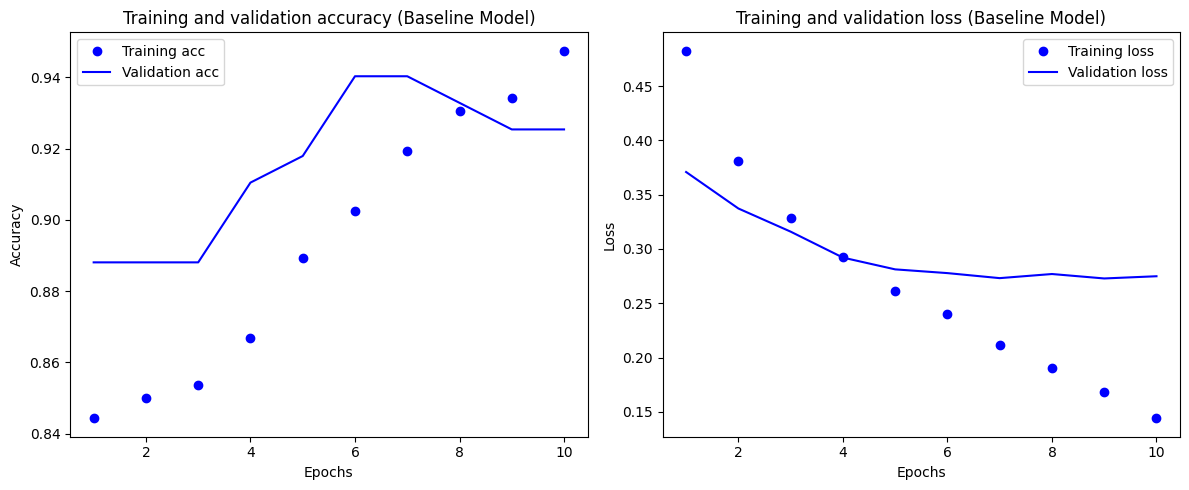

In [23]:
plot_history(baseline_history, title="(Baseline Model)")

#Model with Dropout

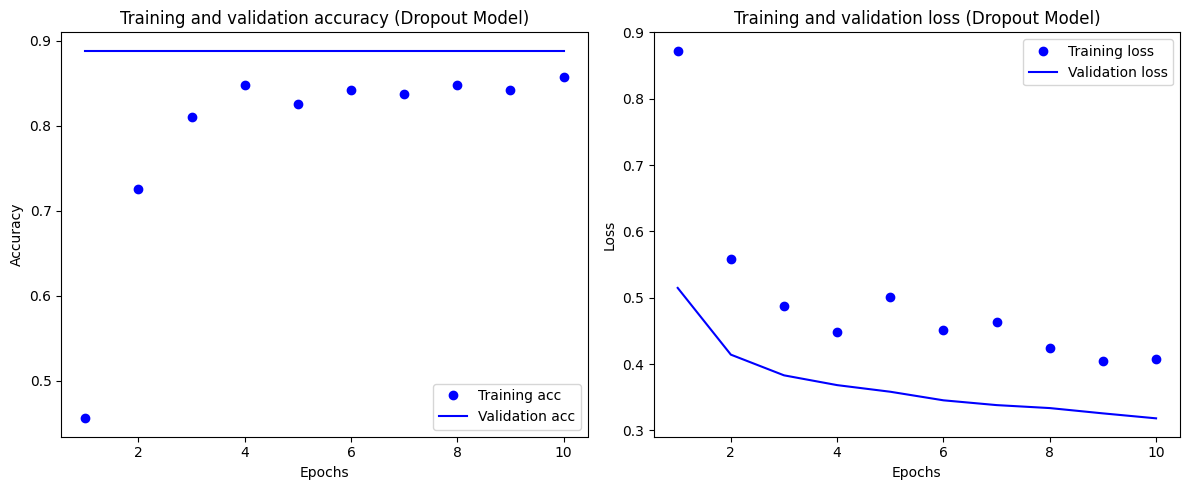

In [24]:

plot_history(dropout_history, title="(Dropout Model)")

#Model with Layer-wise Dropout

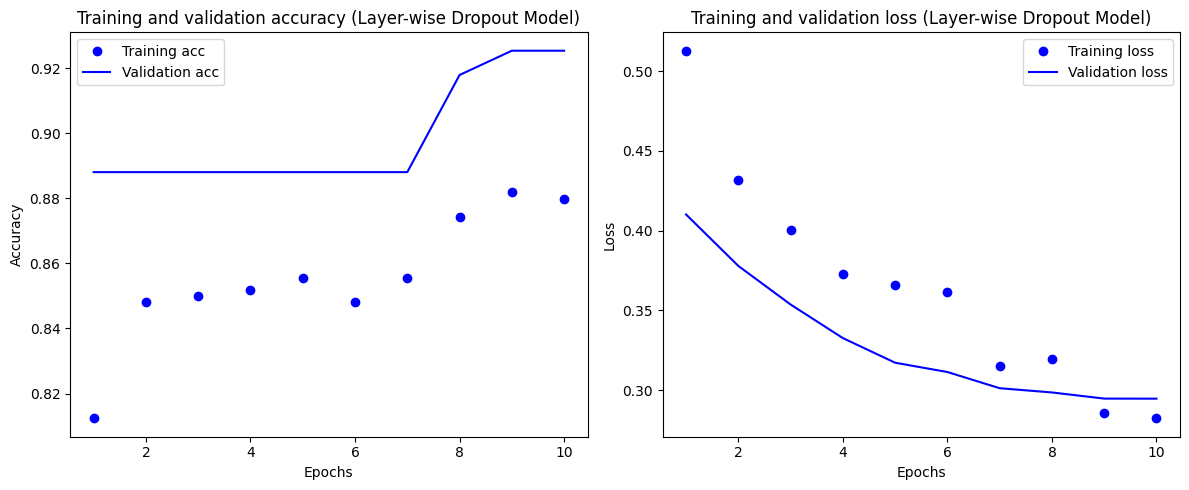

In [25]:
plot_history(layerwise_dropout_history, title="(Layer-wise Dropout Model)")
